In [128]:
import pandas as pd

In [129]:
data = pd.read_csv(r'D:\Data Science\Project1\First\Dataset\heart_disease_uci.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [130]:
cat = data.select_dtypes(include=['object']).columns
print(cat)

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')


In [131]:
data['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect', nan], dtype=object)

In [132]:
clear_null = ['fbs','restecg','exang','slope','thal']
for j in clear_null:
    data[j] = data[j].fillna(data[j].mode())
oneho = ['sex','dataset','cp','fbs','restecg','exang','slope','thal']
for i in oneho:
    data1 = pd.get_dummies(data[i], prefix=i, drop_first=True)
    data.drop(i, axis=1, inplace=True)
    data = pd.concat([data,data1],axis=1)
data.drop('ca', inplace=True, axis=1)

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   trestbps                  861 non-null    float64
 3   chol                      890 non-null    float64
 4   thalch                    865 non-null    float64
 5   oldpeak                   858 non-null    float64
 6   num                       920 non-null    int64  
 7   sex_Male                  920 non-null    bool   
 8   dataset_Hungary           920 non-null    bool   
 9   dataset_Switzerland       920 non-null    bool   
 10  dataset_VA Long Beach     920 non-null    bool   
 11  cp_atypical angina        920 non-null    bool   
 12  cp_non-anginal            920 non-null    bool   
 13  cp_typical angina         920 non-null    bool   
 14  fbs_True  

In [134]:
clear_null = ['trestbps','chol','thalch','oldpeak']
for j in clear_null:
    data[j] = data[j].fillna(data[j].mean())

C:\Users\aruna\AppData\Local\Temp\ipykernel_18484\3079509180.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


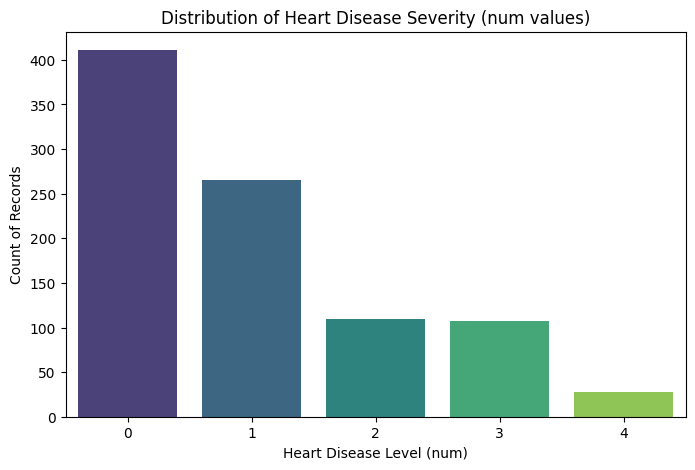

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count values in 'num' column
value_counts = data['num'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# Titles and labels
plt.title("Distribution of Heart Disease Severity (num values)")
plt.xlabel("Heart Disease Level (num)")
plt.ylabel("Count of Records")
plt.xticks(ticks=[0,1,2,3,4])

plt.show()

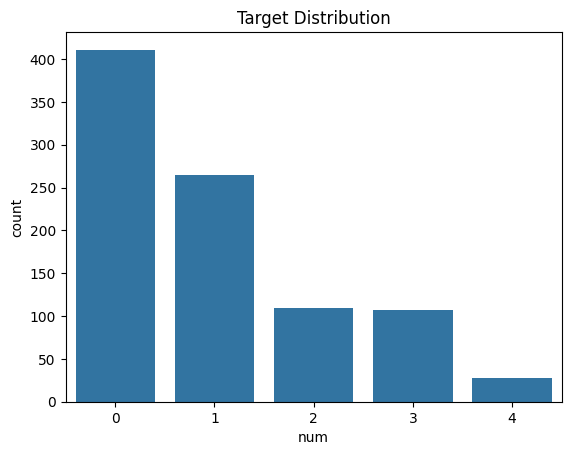

In [137]:
data.isnull().sum()
data.duplicated().sum()
data['target'] = data['num'].apply(lambda x: 1 if x > 0 else 0)
data.drop('num', axis=1, inplace=True)

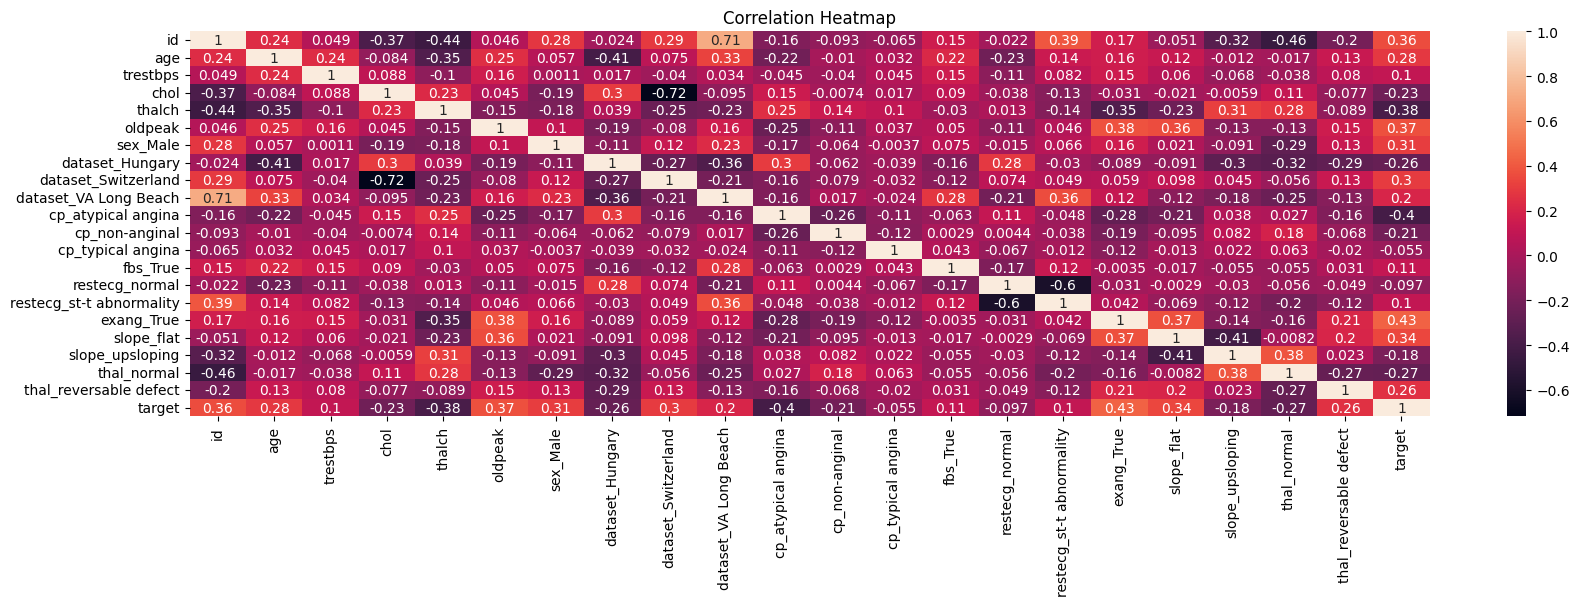

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data.drop('target',axis=1), data['target'], test_size=0.2, random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [125]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train,y_train)
ypred= model.predict(x_test)

In [126]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

print('Classification:', classification_report(y_test,ypred))
print('Confussion:', confusion_matrix(y_test,ypred))
print('Accuracy:', accuracy_score(y_test,ypred))

Classification:               precision    recall  f1-score   support

           0       0.85      0.83      0.84        75
           1       0.88      0.90      0.89       109

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184

Confussion: [[62 13]
 [11 98]]
Accuracy: 0.8695652173913043
